<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Speed          51 non-null     int64
 1   Stopping_dist  51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


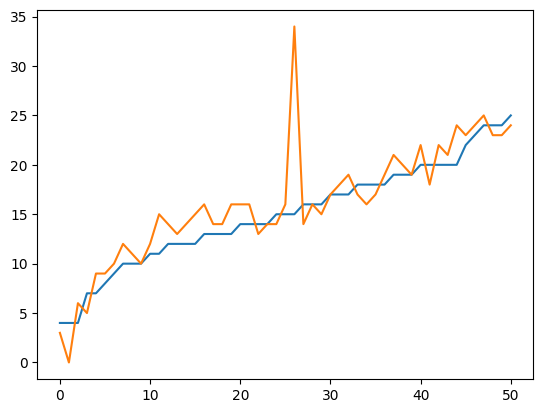

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
myData = pd.read_csv(r'C:\Users\Тома\mycar_lin.csv')
myData.info()
myData.describe()
plt.plot(myData)

25-й перцентиль: 13.5, 75-й перцентиль: 19.5, IQR: 6.0,  Границы выбросов:[4.5, 28.5].


count    48.000000
mean     16.270833
std       4.814604
min       5.000000
25%      14.000000
50%      16.000000
75%      19.250000
max      25.000000
Name: Stopping_dist, dtype: float64

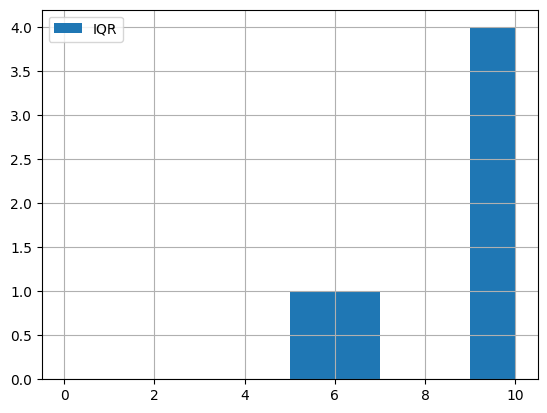

In [3]:
median = myData.Stopping_dist.median()
IQR = myData.Stopping_dist.quantile(0.75) - myData.Stopping_dist.quantile(0.25)
perc25 = myData.Stopping_dist.quantile(0.25)
perc75 = myData.Stopping_dist.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов:[{f}, {l}].".format(f=perc25 - 1.5*IQR,l=perc75 + 1.5*IQR))
myData.Stopping_dist.loc[myData.Stopping_dist.between(perc25 - 1.5*IQR,perc75 + 1.5*IQR)].hist(bins = 10, range=(0,10), label = 'IQR')
plt.legend()
myData = myData.loc[myData.Stopping_dist.
between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
myData.Stopping_dist.describe()

In [4]:
# распределим значения по двум переменным
X = myData.iloc[:,0:1].values
Y = myData.iloc[:,1].values
myData.head(5)

,Speed,Stopping_dist
2,4,6
3,7,5
4,7,9
5,8,9
6,9,10


In [10]:
# разобьем на тестовую и обучающую:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)
X_train

array([[22],
       [24],
       [20],
       [25],
       [18],
       [20],
       [12],
       [11],
       [19],
       [18],
       [12],
       [17],
       [23],
       [14],
       [10],
       [16],
       [13],
       [13],
       [ 7],
       [12],
       [20],
       [17],
       [16],
       [15],
       [10],
       [20],
       [24],
       [13],
       [ 8],
       [11],
       [19],
       [17],
       [ 4]], dtype=int64)

In [11]:
X_test, Y_train, Y_test

(array([[16],
        [ 7],
        [15],
        [ 9],
        [13],
        [20],
        [24],
        [19],
        [12],
        [10],
        [18],
        [18],
        [14],
        [14],
        [14]], dtype=int64),
 array([23, 23, 18, 24, 16, 21, 15, 15, 19, 17, 14, 18, 24, 13, 10, 15, 14,
        16,  9, 13, 24, 19, 16, 16, 12, 22, 25, 16,  9, 12, 21, 17,  6],
       dtype=int64),
 array([14,  5, 14, 10, 14, 22, 23, 20, 14, 11, 19, 17, 16, 14, 16],
       dtype=int64))

In [12]:
# строим model
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель линейная регрессия
myModel.fit(X_train, Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [16]:
# предсказать значения зависимой переменной для тестовой выборки
# предсказать значения зависимой переменной для тестовой выборки
y_pred = myModel.predict(X_test)
print(myModel.intercept_, myModel.coef_)
y_pred

2.7007955724662693 [0.89014182]


array([16.94306468,  8.93178831, 16.05292286, 10.71207195, 14.27263923,
       20.50363196, 24.06419924, 19.61349014, 13.38249741, 11.60221377,
       18.72334832, 18.72334832, 15.16278104, 15.16278104, 15.16278104])

In [18]:
from sklearn import metrics
# Сравниваем предсказанные значения (y_pred) с реальными (Y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(Y_test,
y_pred))
# MSE
print('MSE:', metrics.mean_squared_error(Y_test,
y_pred))
#Вычисляем коэффициент детерминации
print('R_2:', metrics.r2_score(Y_test, y_pred))

MAE: 1.2610999654098918
MSE: 2.598790300396313
R_2: 0.8721626983845276
